<a href="https://colab.research.google.com/github/DianaRoor/-/blob/main/_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy import stats

Задание №1
Загрузите файл HR.csv в pandas dataframe

In [ ]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Задание №2

Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.median()

<ipython-input-6-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [ ]:
df['left'].value_counts(normalize = True) #смотрим сколько людей уволилось/не уволилось

0    0.761917
1    0.238083
Name: left, dtype: float64

Задание № 3


Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные

In [ ]:
df_newcorr = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
df_newcorr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


<Axes: >

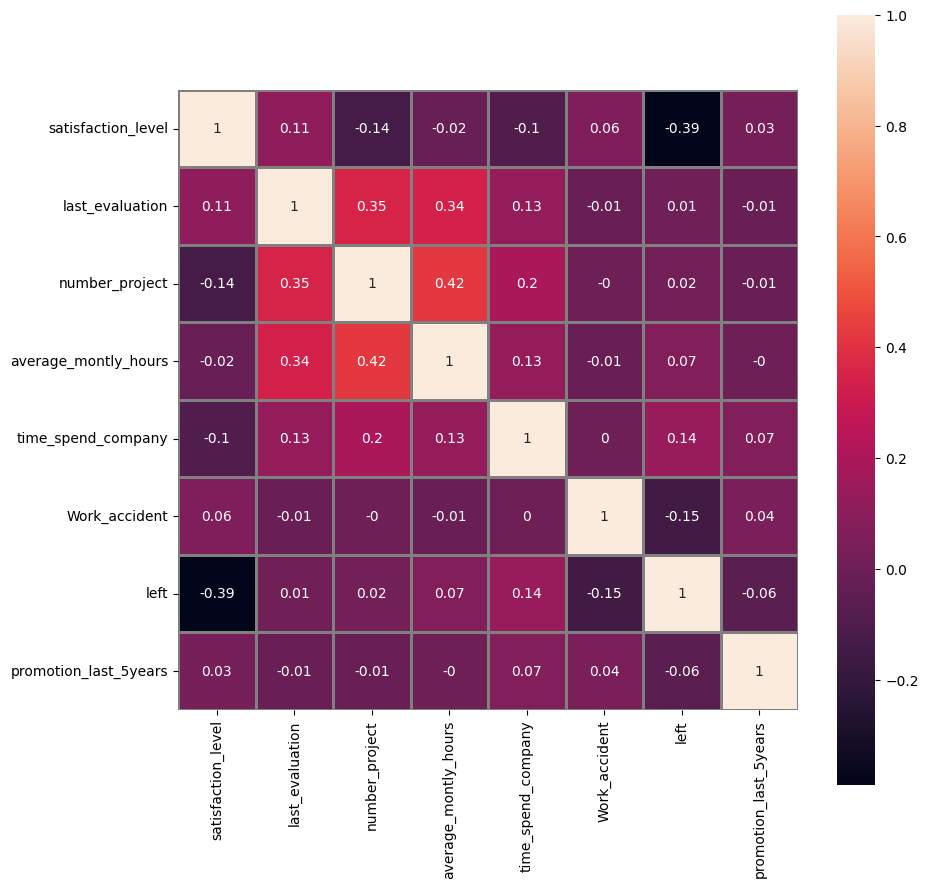

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_newcorr.corr().round(2), annot=True, square=True, linewidths=1, linecolor='gray')

Положительная взаимосвязь.

Согласно матрицы корреляци, можем сделать вывод что **average_monthly_hours**  (Среднее количество часов на рабочем месте в месяц) и **number_projects**(Количество проектов, выполненных за время работы)(0,42), имеют взаимосвязь, что вполне разумно,чем больше проектов, тем больше количество часов на работчем месте, так же в спреднем. И небольшая взаимосвязь наблюдается **number_projects**(Количество проектов, выполненных за время работы) и Last_evaluation(Время с момента последней оценки в годах), ( 0,35), что так же вполне логично.

Отрицательная взаимосвязь.

Две отрицательные взаимосвязи мы наблюдаем у переменных **work_accident** (Происходили ли несчастные случаи на рабочем месте с сотрудником)
**left** - уволился ли сотрудник (-0,15), а так же **left**(уволился ли сотрудник) и **satisfaction_level**(Уровень удовлетворенности работой),(-0,39)


Задание №4

Рассчитайте сколько сотрудников работает в каждом
департаменте

In [ ]:
df.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

In [ ]:
df.groupby('department').mean() #так же можем расчитать средние значения по отделам

<ipython-input-11-6cdd7c2af2b6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('department').mean() #так же можем расчитать средние значения по отделам


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


Задание 5

Показать распределение сотрудников по зарплатам.

<Axes: xlabel='salary'>

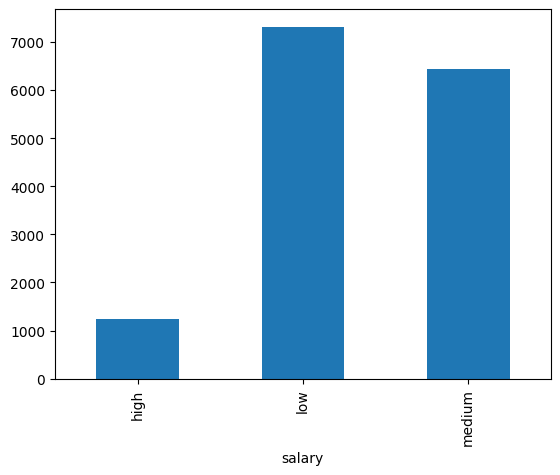

In [ ]:
df.groupby('salary')['salary'].count().plot(kind="bar")

Задание № 6

Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [ ]:
post = df.groupby([df['department'],df['salary']])[['salary']].count()
post

salary
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

<Axes: xlabel='department,salary'>

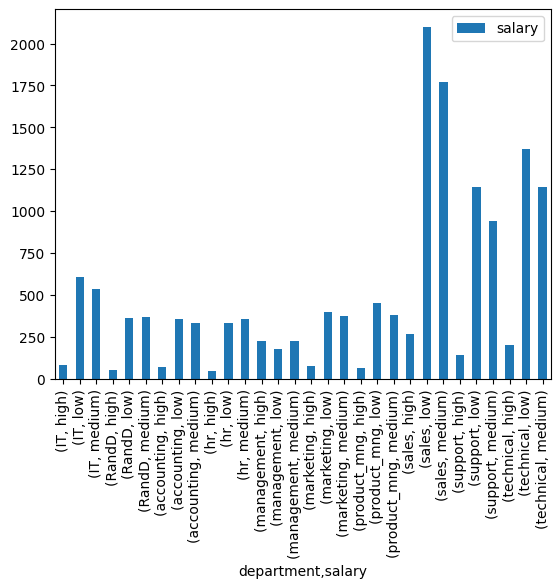

In [ ]:
post.plot(kind='bar', stacked=True)

Задание №7

Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [ ]:
high_salary = df[df['salary'] == 'high']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']

#Проверяем равенство дисперсий
print(np.var(high_salary), np.var(low_salary))
#Отношение большей дисперсии выборки к меньшей дисперсии выборки составляет 2583.5608 / 2274.44644 = 1,135 , что меньше 4.
#Это означает, что мы можем предположить, что дисперсии генеральной совокупности равны.
#Таким образом, мы можем приступить к выполнению двухвыборочного t-критерия с равными дисперсиями:


2274.446448725598 2583.560813910716


In [ ]:
t_stat, p_value = stats.ttest_ind(high_salary, low_salary, equal_var=True)

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу. Сотрудники с высоким окладом проводят больше времени на работе.")
else:
    print("Нет статистически значимых различий. Гипотезу о разнице времени на работе сотрудников с разными окладами не подтверждаем.")


Нет статистически значимых различий. Гипотезу о разнице времени на работе сотрудников с разными окладами не подтверждаем.


Задание №8

Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [ ]:
#Уволенные/не уволенные сотрудники
resigned = df[df['left'] == 1]
current = df[df['left'] == 0]

#Расчитываем долю сотрудников с повышением за последние 5 лет
resigned_promotion_last_5years = resigned['promotion_last_5years'].mean()
current_promotion_last_5years = current['promotion_last_5years'].mean()

#Расчитываем среднюю степень удовлетворенности
resigned_satisfaction_level = resigned['satisfaction_level'].mean()
current_satisfaction_level = current['satisfaction_level'].mean()

#Расчитываем среднее количество проектов
resigned_number_project = resigned['number_project'].mean()
current_number_project = current['number_project'].mean()

print("Сотрудники которые уволились:")
print("Доля сотрудников с повышением за последние 5 лет:", resigned_promotion_last_5years)
print("Средняя степень удовлетворенности:", resigned_satisfaction_level)
print("Среднее количество проектов:", resigned_number_project)

print("Сотрудники которые не уволились:")
print("Доля сотрудников с повышением за последние 5 лет:", current_promotion_last_5years)
print("Средняя степень удовлетворенности:", current_satisfaction_level)
print("Среднее количество проектов:", current_number_project)

Сотрудники которые уволились:
Доля сотрудников с повышением за последние 5 лет: 0.005320638476617194
Средняя степень удовлетворенности: 0.4400980117614114
Среднее количество проектов: 3.8555026603192384
Сотрудники которые не уволились:
Доля сотрудников с повышением за последние 5 лет: 0.026251312565628283
Средняя степень удовлетворенности: 0.666809590479524
Среднее количество проектов: 3.786664333216661


Согласно показателям, можем сделать следующие выводы:

 - есть разница между долей сотрудников с повышением за последние 5 лет, которые уволились и которые нет.Следовательно можно преположить, что данный показатель влияет на выбор сотрудника остаться или уйти.

 - есть незначительная разница в средней степени удовлетворенности, среди уволившихся и не уволившихся сотрудников, что так же влияет на их решение.

 - а вот показатель среднее количество проектов, имеет незначительную разницу, могу сделать вывод, что количество проектов никак не влияет на выбор сотрудника уволиться, либо остаться.

Задание №9

Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#Подготовим выборку, для обучения модели
X = df[['satisfaction_level', 'last_evaluation','number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 42)

In [ ]:
lda =  LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
#смотрим на коэффициенты
lda.coef_

array([[-4.57738626e+00,  6.13822647e-01, -2.10613368e-01,
         4.55442333e-03,  2.21314862e-01, -1.05033789e+00,
        -1.08559074e+00]])

In [ ]:
lda.intercept_

array([0.14022001])

In [ ]:
predictions = lda.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f'Точность на тестовой выборке: {accuracy}')

Точность на тестовой выборке: 0.7557777777777778


Задание № 10
Загрузить colab с решение на github и прислать ссылку

In [ ]:
!apt-get install -qq git

https://gist.github.com/a7d815cda672a5353180e8e22f8d6693.git